In [2]:
import pandas as pd
etfs = ["510500.SS", "510300.SS", "159949.SS"]
df1 = pd.read_csv("/Users/apple/Documents/Jupyter/ETF_quantitative_strategy/data/"+"510500.SS"+".csv")
df2 = pd.read_csv("/Users/apple/Documents/Jupyter/ETF_quantitative_strategy/data/"+"510300.SS"+".csv")
df3 = pd.read_csv("/Users/apple/Documents/Jupyter/ETF_quantitative_strategy/data/"+"159949.SS"+".csv")
dfs = [df1, df2, df3]

def get_v_10(num, df):
    count = 0
    for i in range(num, num+10):
        count += df.at[num, "volume"]
    return count//10

def get_advice(num, df):
#advices = [False, False, False]
# based on the previous day
    ratio = df.at[num+1,"close"]/df.at[num+1,"open"]
    if ratio < 1.03 and ratio > 0.98 and df.at[num+1, "volume"] < 3 * get_v_10(num+1, df):
            return True
    return False

strategy = [False, False, False]
portfolio = pd.DataFrame(index = list(range(100)), columns = ['h1','h2','h3','total'])
portfolio["total"] = 10000
for i in reversed(range(0, 89)):
    advices = []
    for j in range(len(dfs)):
        advices.append(get_advice(i,dfs[j]))
    #print(advices)
    eve = advices.count(True)
    #print(eve)
    count = 0
    if eve != 0:
        buy_each = portfolio.at[i+1, "total"]//eve
    else:
        buy_each = 0
        count = portfolio.at[i+1, "total"]
    #print(buy_each)
    prev = portfolio.loc[i+1, ['h1','h2','h3']]
    cur = []
    for j in range(len(etfs)):
        if advices[j]: #集合竞价
            #print(dfs[j].at[i, "open"], buy_each)
            cur.append(buy_each//dfs[j].at[i, "open"])
        else:
            cur.append(0)
    #print("here",cur)
    a = ['h1','h2','h3']
    #count = 0
    for j in range(len(a)):
        portfolio.at[i,a[j]] = cur[j]
        count += cur[j] * dfs[j].at[i, "close"]
    portfolio.at[i, "total"] = count
        
print(portfolio)

     h1   h2    h3  total
0   490  850  3037  10817
1   489  850  3036  10856
2   495  853  3038  10679
3   493  849  3053  10765
4   496  846  3041  10710
..  ...  ...   ...    ...
95  NaN  NaN   NaN  10000
96  NaN  NaN   NaN  10000
97  NaN  NaN   NaN  10000
98  NaN  NaN   NaN  10000
99  NaN  NaN   NaN  10000

[100 rows x 4 columns]


In [3]:
portfolio["total"]

0     10817
1     10856
2     10679
3     10765
4     10710
      ...  
95    10000
96    10000
97    10000
98    10000
99    10000
Name: total, Length: 100, dtype: int64

In [4]:
import matplotlib.pyplot as plt

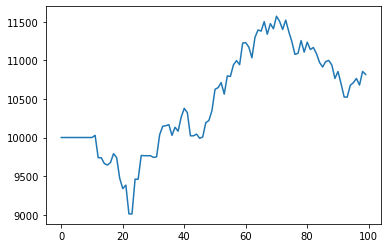

In [5]:
plt.plot(list(portfolio["total"])[::-1])

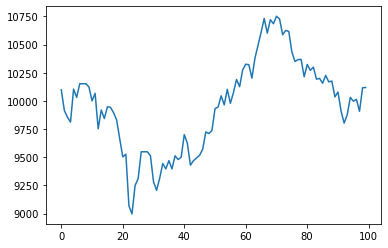

In [6]:
plt.plot(list(df2["close"] * (10000/df2.at[89, "close"]) )[::-1])

In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [8]:
ax = fig.add_subplot(1,1,1)

In [9]:
ax.plot(list(df2["close"] * (10000/df2.at[89, "close"]) )[::-1], label = "two")

In [10]:
ax.plot(list(portfolio["total"])[::-1], label = "FOUR")

In [11]:
ax.plot(list(df1["close"] * (10000/df1.at[89, "close"]) )[::-1], label = "one")

In [12]:
ax.plot(list(df3["close"] * (10000/df3.at[89, "close"]) )[::-1], label = "three")

In [13]:
ax.legend(loc = "best")

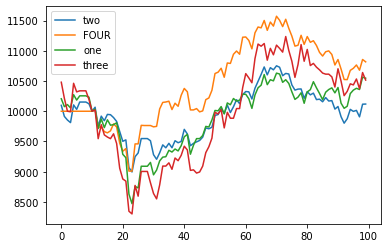

In [14]:
fig

In [17]:
#(90 days, return 817-180/10000 = 6.37%)
1.0637 ** 4

1.2801965042601364

In [ ]:
#(yearly 28% return )